<a href="https://colab.research.google.com/github/hewan00/visualization_assignment/blob/main/visual2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
#python tools neededd
## Import libraries we will use for calculations and plotting


In [81]:
!git clone https://github.com/ds3001f25/visualization_assignment.git

fatal: destination path 'visualization_assignment' already exists and is not an empty directory.


In [82]:
import pandas as pd

df = pd.read_csv("visualization_assignment/data/college_completion.csv")
df.head()


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [83]:
## Import libraries we will use for calculations and plotting
def kernel_function(z, kernel="gaussian"):
    """
    z: standardized distances (array)
    kernel: "gaussian", "uniform", or "epanechnikov"
    Returns: kernel values for each z
    """
    ## Define how each "bump" (kernel) looks
# Gaussian → bell curve, Uniform → flat, Epanechnikov → triangle
    if kernel == "gaussian":
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)
    elif kernel == "uniform":
        # 1/2 within |z| <= 1, else 0
        return 0.5 * np.where(np.abs(z) <= 1, 1, 0)
    elif kernel == "epanechnikov":
        # 3/4*(1 - z^2) within |z| <= 1, else 0
        return 0.75 * (1 - z**2) * np.where(np.abs(z) <= 1, 1, 0)
    else:
        raise ValueError("Invalid kernel type. Choose 'gaussian', 'uniform', or 'epanechnikov'.")

In [84]:
### Decide how wide each bump is (bandwidth)
# Default uses Silverman’s method but you can pick your own
def get_bandwidth(data, bandwidth="silverman"):
    """
    data: 1D array
    bandwidth: "silverman" or numeric value
    Returns: bandwidth (h)
    """
    n = len(data)
    std = np.std(data, ddof=1)

    if bandwidth == "silverman":
        return 1.06 * std * n ** (-1/5)
    elif isinstance(bandwidth, (int, float)) and bandwidth > 0:
        return bandwidth
    else:
        raise ValueError("Bandwidth must be 'silverman' or a positive number")


In [85]:
def my_kde(data, kernel="gaussian", bandwidth="silverman", x_grid=None, use_cdist=False):
    """
    Custom kernel density estimator
    data: Pandas Series or numpy array
    kernel: "gaussian", "uniform", "epanechnikov"
    bandwidth: "silverman" or numeric
    x_grid: points to evaluate KDE, optional
    use_cdist: if True, use scipy cdist; else use numpy broadcasting
    Returns: x_grid, density values
    """
    data = np.asarray(data)
    n = len(data)

    # Compute bandwidth
    h = get_bandwidth(data, bandwidth)

    # Default x_grid
    if x_grid is None:
        x_grid = np.linspace(data.min() - 1, data.max() + 1, 200)

    # Compute pairwise distances
    if use_cdist:
        distances = cdist(x_grid.reshape(-1, 1), data.reshape(-1, 1)) / h
    else:
        distances = (x_grid[:, None] - data[None, :]) / h

    # Apply kernel
    kernel_vals = kernel_function(distances, kernel)

    # KDE formula
    densities = kernel_vals.mean(axis=1) / h

    return x_grid, densities

    ### Make the KDE function that takes data and returns a smooth curve
# Can choose kernel type, bandwidth, and x values to check


In [86]:
def plot_kde_comparison(data, kernel="gaussian", bandwidth="silverman"):
    x_grid = np.linspace(data.min() - 1, data.max() + 1, 300)
    x, my_density = my_kde(data, kernel=kernel, bandwidth=bandwidth, x_grid=x_grid)

    plt.figure(figsize=(10,6))
    sns.lineplot(x=x, y=my_density, label=f"My KDE ({kernel})", color="blue")
    sns.kdeplot(data, label="Seaborn KDE", color="red", linestyle="--")
    plt.title(f"KDE Comparison ({kernel} kernel, bandwidth={bandwidth})")
    plt.xlabel("X")
    plt.ylabel("Density")
    plt.legend()
    plt.show()



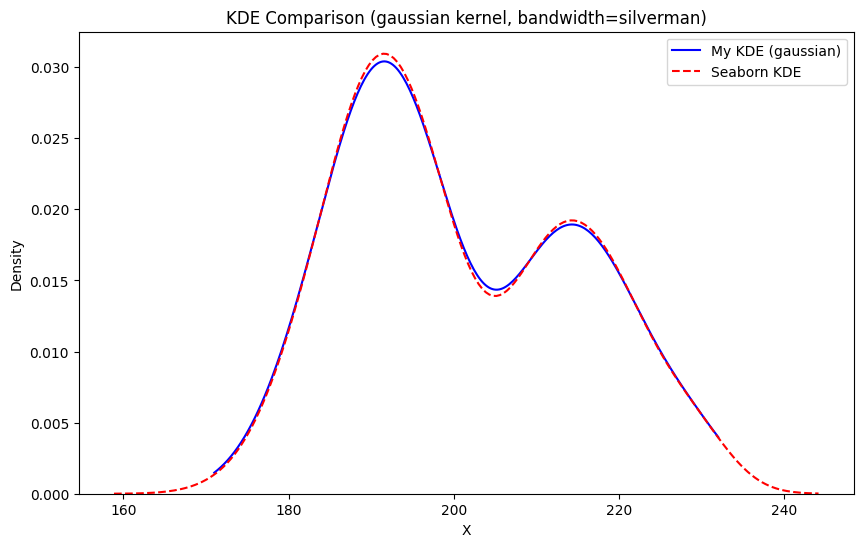

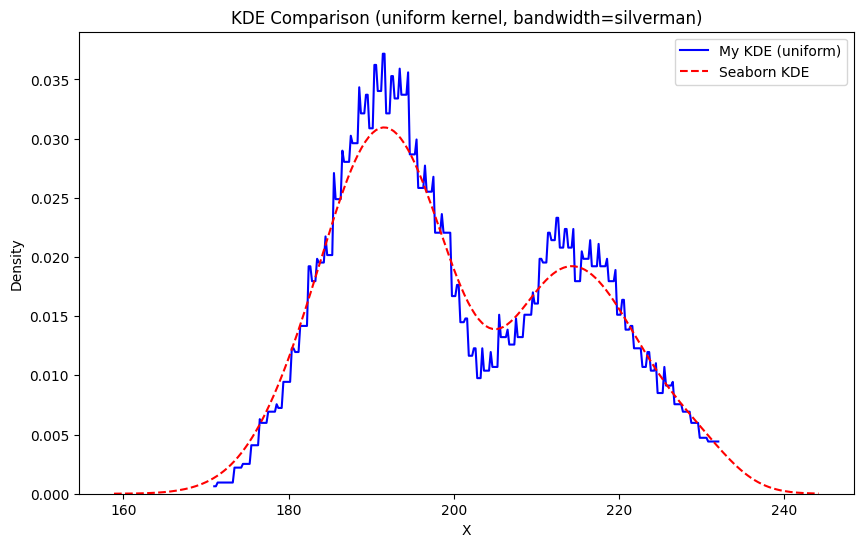

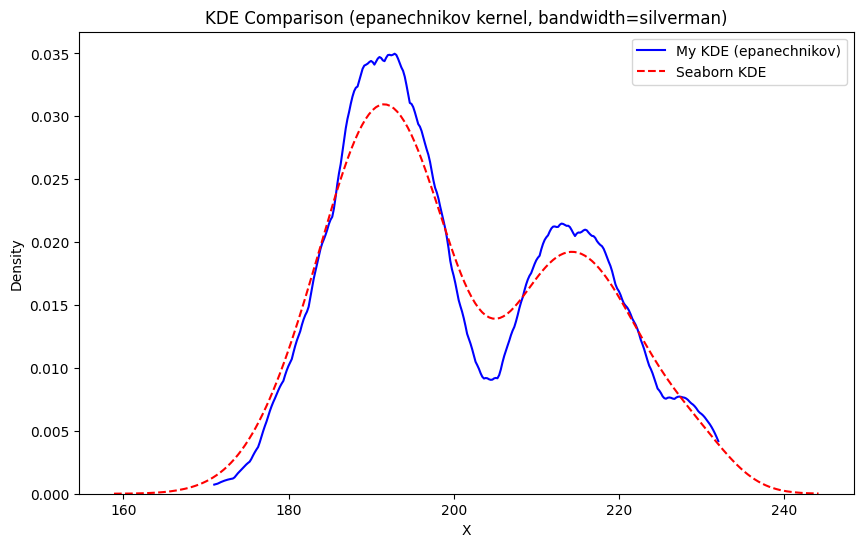

In [87]:
# Example test
import seaborn as sns
data = sns.load_dataset("penguins")["flipper_length_mm"].dropna()

# Gaussian
plot_kde_comparison(data, kernel="gaussian", bandwidth="silverman")
# Uniform
plot_kde_comparison(data, kernel="uniform", bandwidth="silverman")
# Epanechnikov
plot_kde_comparison(data, kernel="epanechnikov", bandwidth="silverman")

## Load example data and compare kernels
# This is just to test if your KDE function works


In [88]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [90]:
DATA_PATH = "/content/visualization_assignment/data/college_completion.csv"
df = pd.read_csv(DATA_PATH)

# Inspect dataset
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())
print("\n=== Missing Values ===")
print(df.isna().sum())

Shape: (3798, 63)
Columns: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_e

In [91]:
ct = pd.crosstab(df["control"], df["level"])
print("\n=== Cross-tabulation: control × level ===")
print(ct)



=== Cross-tabulation: control × level ===
level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


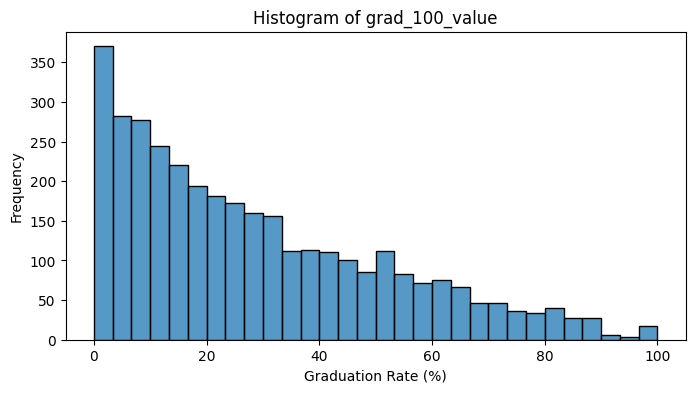

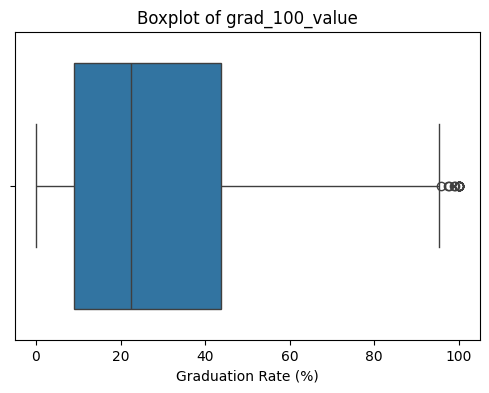


=== grad_100_value Summary ===
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [92]:
g = df["grad_100_value"].dropna()

# Histogram
plt.figure(figsize=(8,4))
sns.histplot(g, bins=30, kde=False)
plt.title("Histogram of grad_100_value")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=g)
plt.title("Boxplot of grad_100_value")
plt.xlabel("Graduation Rate (%)")
plt.show()

# Statistical description
print("\n=== grad_100_value Summary ===")
print(g.describe())


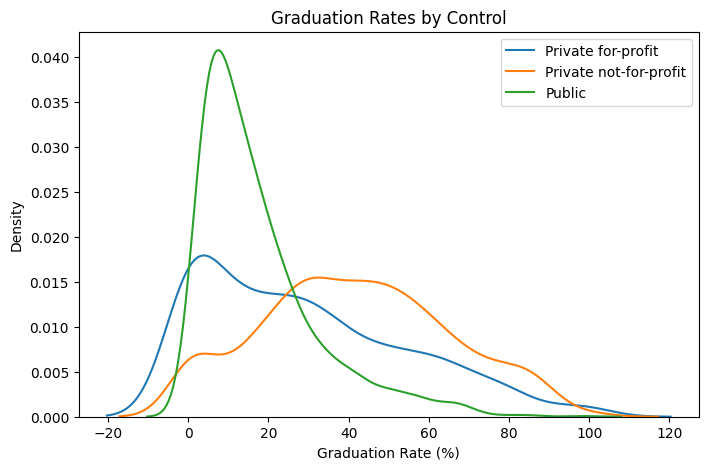

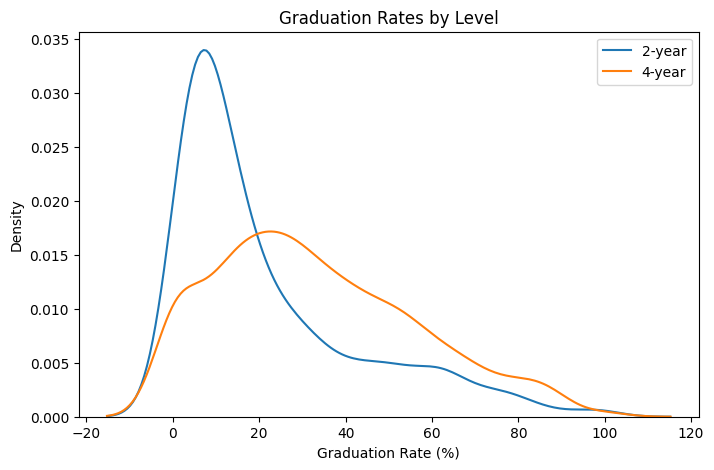


=== grad_100_value by Control ===
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  

=== grad_100_value by Level ===
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


In [93]:
## Make grouped KDEs by control and by level
# By control
plt.figure(figsize=(8,5))
for name, group in df.dropna(subset=["grad_100_value"]).groupby("control"):
    sns.kdeplot(group["grad_100_value"], label=name)
plt.title("Graduation Rates by Control")
plt.xlabel("Graduation Rate (%)")
plt.legend()
plt.show()

# By level
plt.figure(figsize=(8,5))
for name, group in df.dropna(subset=["grad_100_value"]).groupby("level"):
    sns.kdeplot(group["grad_100_value"], label=name)
plt.title("Graduation Rates by Level")
plt.xlabel("Graduation Rate (%)")
plt.legend()
plt.show()

# Grouped statistics ## Get stats of graduation rates grouped by control or level

print("\n=== grad_100_value by Control ===")
print(df.groupby("control")["grad_100_value"].describe())

print("\n=== grad_100_value by Level ===")
print(df.groupby("level")["grad_100_value"].describe())


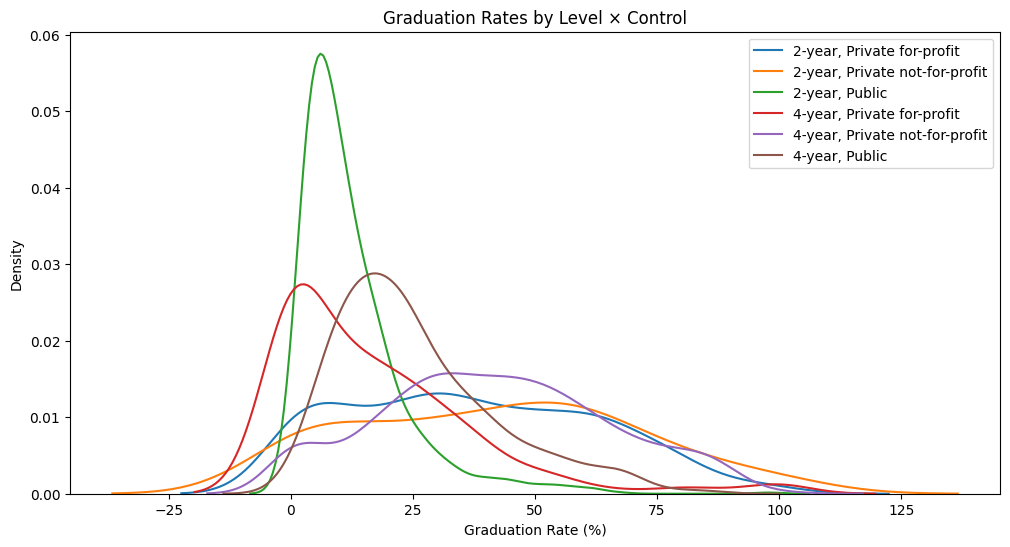


=== grad_100_value by Level × Control ===
                                 count       mean        std  min     25%  \
levelXcontrol                                                               
2-year, Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
2-year, Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
2-year, Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year, Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
4-year, Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
4-year, Public                   573.0  25.561082  16.403902  0.0  13.600   

                                 50%     75%    max  
levelXcontrol                                        
2-year, Private for-profit      33.9  57.800  100.0  
2-year, Private not-for-profit  44.4  61.200  100.0  
2-year, Public                   9.4  16.175   97.8  
4-year, Private for-profit      12.5  26.325  100.0  
4-year, Private 

In [94]:
df["levelXcontrol"] = df["level"].astype(str) + ", " + df["control"].astype(str)

# Grouped KDE
plt.figure(figsize=(12,6))
for name, group in df.dropna(subset=["grad_100_value"]).groupby("levelXcontrol"):
    sns.kdeplot(group["grad_100_value"], label=name)
plt.title("Graduation Rates by Level × Control")
plt.xlabel("Graduation Rate (%)")
plt.legend()
plt.show()

# Grouped stats
print("\n=== grad_100_value by Level × Control ===")
print(df.groupby("levelXcontrol")["grad_100_value"].describe())


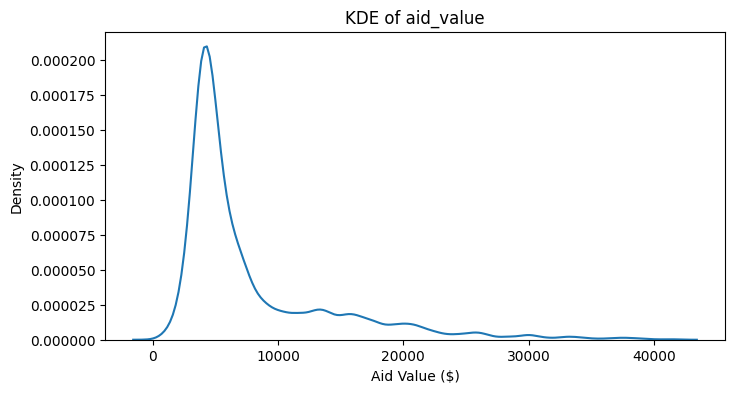

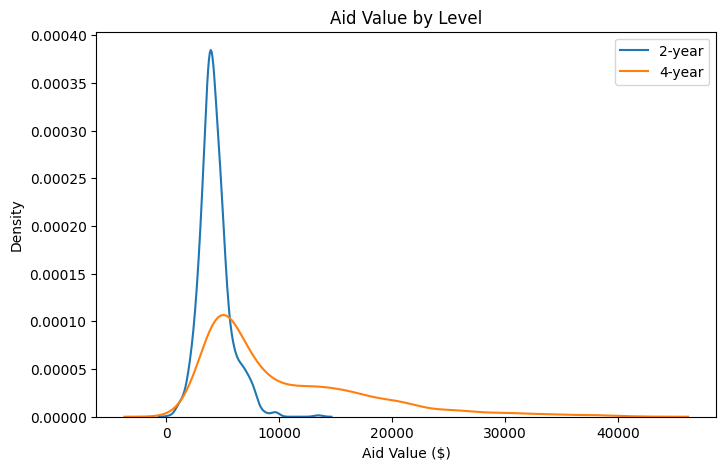

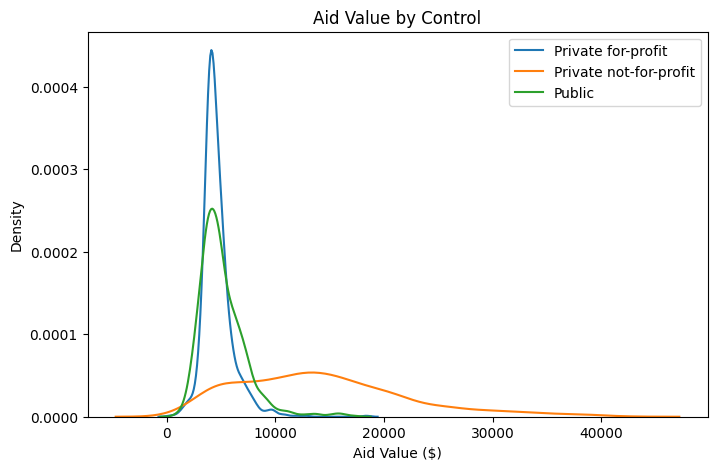


=== aid_value by Level ===
         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  13654.0  
4-year  41580.0  

=== aid_value by Control ===
                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-pro

In [95]:
a = df["aid_value"].dropna()

# KDE of aid_value overall
plt.figure(figsize=(8,4))
sns.kdeplot(a, bw_adjust=0.5)
plt.title("KDE of aid_value")
plt.xlabel("Aid Value ($)")
plt.show()

# KDE grouped by level
plt.figure(figsize=(8,5))
for name, group in df.dropna(subset=["aid_value"]).groupby("level"):
    sns.kdeplot(group["aid_value"], label=name)
plt.title("Aid Value by Level")
plt.xlabel("Aid Value ($)")
plt.legend()
plt.show()

# KDE grouped by control
plt.figure(figsize=(8,5))
for name, group in df.dropna(subset=["aid_value"]).groupby("control"):
    sns.kdeplot(group["aid_value"], label=name)
plt.title("Aid Value by Control")
plt.xlabel("Aid Value ($)")
plt.legend()
plt.show()

# Grouped statistics
print("\n=== aid_value by Level ===")
print(df.groupby("level")["aid_value"].describe())

print("\n=== aid_value by Control ===")
print(df.groupby("control")["aid_value"].describe())


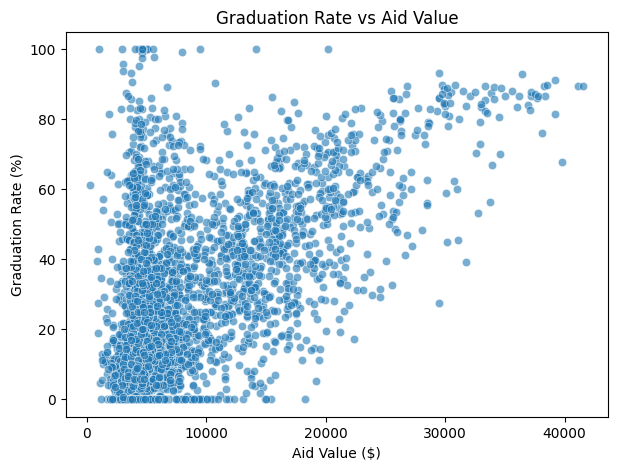

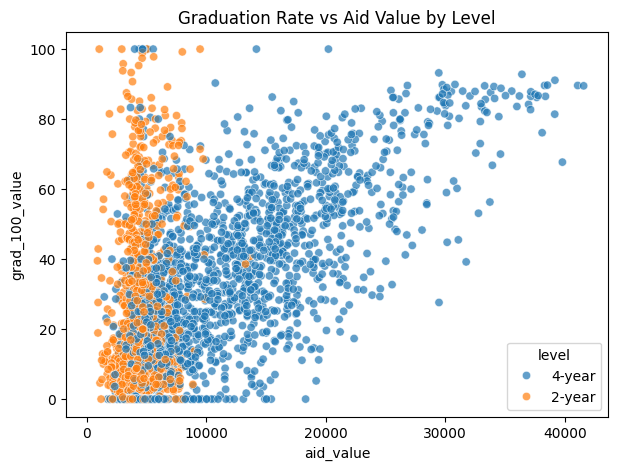

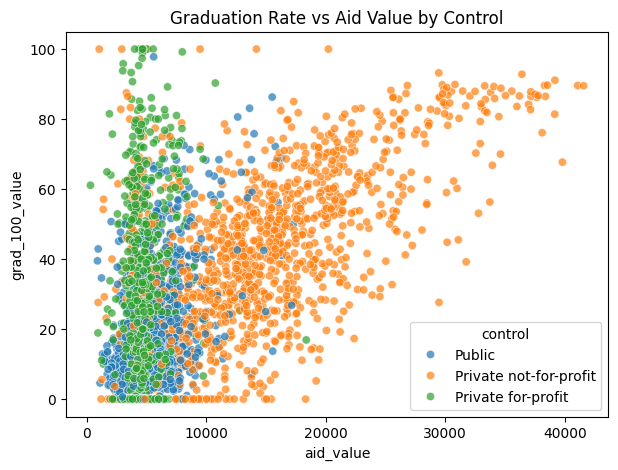


=== Correlation between aid_value and grad_100_value ===
                aid_value  grad_100_value
aid_value        1.000000        0.575879
grad_100_value   0.575879        1.000000


In [96]:
# Overall scatter
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", alpha=0.6)
plt.title("Graduation Rate vs Aid Value")
plt.xlabel("Aid Value ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()

# Scatter by level
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="level", alpha=0.7)
plt.title("Graduation Rate vs Aid Value by Level")
plt.show()

# Scatter by control
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="control", alpha=0.7)
plt.title("Graduation Rate vs Aid Value by Control")
plt.show()

# Correlation
print("\n=== Correlation between aid_value and grad_100_value ===")
print(df[["aid_value", "grad_100_value"]].corr())
